In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Parameters
m1 = 0.125
m2 = 0.875
ka = 1
R0 = 0.15
R = 3
k1 = 1e-4
k2 = 0.649
km1 = 0.788
km2 = 0.045
ktf = 0.5
kts = 0.02
k3 = 4.525
k4 = 65.35
k5 = 0.022
k6 = 0.00456
k7 = 183.6
k8 = 4.85
km3 = 14.54
km4 = 0.67
km5 = 0.0241
km6 = 0.05

In [3]:
# Time parameters
h = 0.0001
tend = 427
N = int(tend / h)

In [4]:
# Initial values
t = np.zeros(N+1)
v1 = np.zeros(N+1); v1[0] = 0.0870
v2 = np.zeros(N+1); v2[0] = 0.0870
v3 = np.zeros(N+1); v3[0] = 2.7427
v4 = np.zeros(N+1); v4[0] = 2.7427
v5 = np.zeros(N+1); v5[0] = 30.3761
v6 = np.zeros(N+1); v6[0] = 0.0258
v7 = np.zeros(N+1); v7[0] = 1.9425

In [5]:
# Euler's method loop
for i in range(N):
    t[i+1] = t[i] + h
    v1[i+1] = v1[i] + h * (m1 * ka * (R0 + R) - k1 * (v1[i] / (km1 + v1[i])) * v5[i] - k2 * (v1[i] / (km2 + v1[i])) * v6[i] - ktf * (v1[i] - v2[i]))
    v2[i+1] = v2[i] + h * (ktf * (v1[i] - v2[i]))
    v3[i+1] = v3[i] + h * (m2 * ka * (R0 + R) - k1 * (v3[i] / (km1 + v3[i])) * v5[i] - k2 * (v3[i] / (km2 + v3[i])) * v6[i] - kts * (v3[i] - v4[i]))
    v4[i+1] = v4[i] + h * (kts * (v3[i] - v4[i]))
    bg = v1[i] + v3[i]
    v5[i+1] = v5[i] + h * (k3 * bg - k4 * (v5[i] / (v5[i] + km3)))
    v6[i+1] = v6[i] + h * (k5 * v5[i] + k6 * v5[i] * v6[i] * (v7[i] / (v7[i] + km4)) - k7 * (v6[i] / (v6[i] + km5)) - k8 * (v6[i] / (v6[i] + km6)))
    v7[i+1] = v7[i] + h * (-k6 * v5[i] * v6[i] * (v7[i] / (v7[i] + km4)) + k8 * (v6[i] / (v6[i] + km6)))

Text(0.5, 1.0, 'Time vs v6')

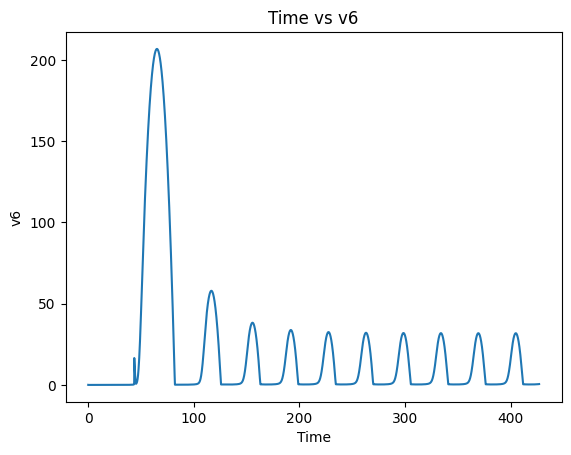

In [6]:
# Plot v6
plt.figure()
plt.plot(t, v6)
plt.xlabel("Time")
plt.ylabel("v6")
plt.title("Time vs v6")

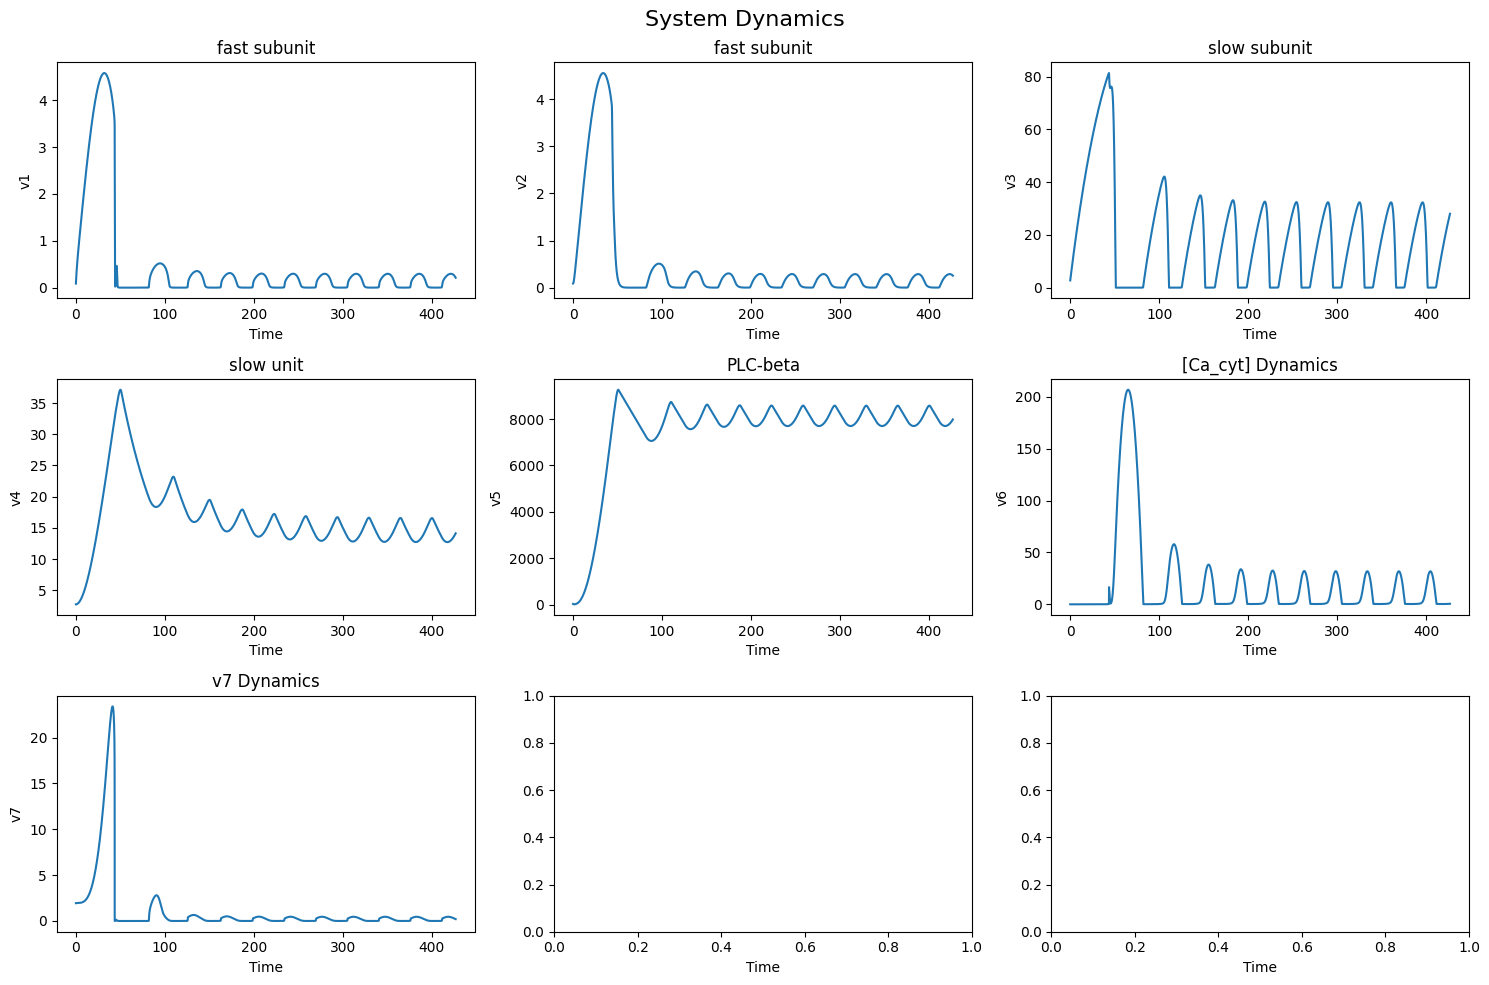

In [7]:

# Subplots for system dynamics
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs[0, 0].plot(t, v1); axs[0, 0].set_title("fast subunit"); axs[0, 0].set_ylabel("v1")
axs[0, 1].plot(t, v2); axs[0, 1].set_title("fast subunit"); axs[0, 1].set_ylabel("v2")
axs[0, 2].plot(t, v3); axs[0, 2].set_title("slow subunit"); axs[0, 2].set_ylabel("v3")
axs[1, 0].plot(t, v4); axs[1, 0].set_title("slow unit"); axs[1, 0].set_ylabel("v4")
axs[1, 1].plot(t, v5); axs[1, 1].set_title("PLC-beta"); axs[1, 1].set_ylabel("v5")
axs[1, 2].plot(t, v6); axs[1, 2].set_title("[Ca_cyt] Dynamics"); axs[1, 2].set_ylabel("v6")
axs[2, 0].plot(t, v7); axs[2, 0].set_title("v7 Dynamics"); axs[2, 0].set_ylabel("v7")
for ax in axs.flat:
    ax.set_xlabel("Time")
plt.suptitle("System Dynamics", fontsize=16)
plt.tight_layout()